In [91]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
warnings.filterwarnings("ignore")
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import scipy.cluster.hierarchy as sch

In [22]:
#Q1.1
FifaData = pd.read_csv('/Users/klnimri/Downloads/archive/players_22.csv')

In [23]:
#Q1.2
ColumnsForClustering = ["overall", "potential", "wage_eur", "value_eur", "age"]
Clustering_data = FifaData[ColumnsForClustering].dropna()
DataForScaling = Clustering_data
ScaledData = ((DataForScaling - DataForScaling.min()) / (DataForScaling.max() - DataForScaling.min())) * 10 + 1
Clustering_data = ScaledData
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Clustering_data)

In [24]:
#Q1.3
linkage_matrix = linkage(ScaledData, method='ward')

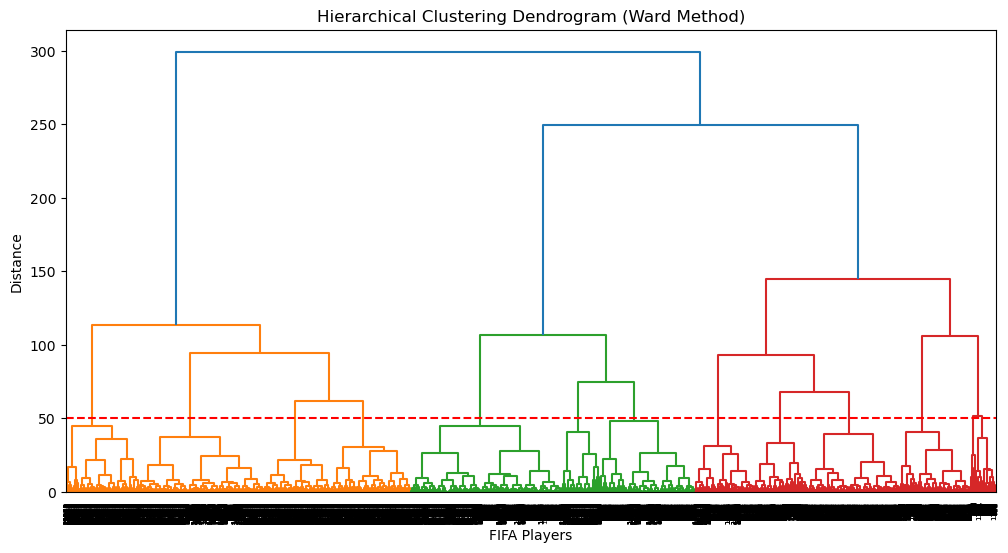

In [25]:
#Q1.4
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Ward Method)")
plt.xlabel("FIFA Players")
plt.ylabel("Distance")

plt.axhline(y=50, color='r', linestyle='--')

plt.show()

In [26]:
#Q1.5
#There is a Huge difference, in Lab 3 I chose K = 6
#But this time the Dendrogram using the threshold i chose which is 50,
#the number of clusters would equal 12 based on my threshold
#I would prefer the elbow method because it is easier to determine the optimal number of k using it.
#The dendrogram doesn't help you to find the number of k, it totaly depends on your choice of the threshold.

In [69]:
#Q1.6
hc = AgglomerativeClustering(n_clusters = 12, affinity = 'euclidean', linkage ='ward')
y_hc = hc.fit_predict(linkage_matrix)
y_hc

array([ 0,  0,  0, ..., 11, 11, 11])

In [87]:
#Q1.7
import plotly as py
import plotly.graph_objs as go

color_mapping = {
    0: 'blue',    
    1: 'green',   
    2: 'red',     
}

cluster_colors = [color_mapping.get(label, 'gray') for label in y_hc]

trace1 = go.Scatter3d(
    x=FifaData['potential'],
    y=FifaData['wage_eur'],  
    z=FifaData['value_eur'],  
    mode='markers',
    marker=dict(
        color=cluster_colors, 
        size=10,
        line=dict(
            color=cluster_colors, 
            width=12
        ),
        opacity=0.8
    )
)
data = [trace1]
layout = go.Layout(
    title='Clusters using Agglomerative Clustering',
    scene=dict(
        xaxis=dict(title='potential'),
        yaxis=dict(title='wage_eur'),
        zaxis=dict(title='value_eur')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


In [88]:
#Q1.8
"""
The ward method calculate the distance using:

-Initialization:At the beginning, each data point is considered
a separate cluster.

-Merging clusters: merging clusters that are closest to each other
In the Ward method, the criterion is the change in the total
within-cluster variance when two clusters are merged.

-Cluster variance: To calculate the change in within-cluster variance, 
the algorithm needs to compute the variance within each cluster
and the variance that would result from merging two clusters.

-Change in variance:he Ward method compares the total within-cluster 
variance before and after merging two clusters.
The change in variance, often referred to as the error sum of squares.

-Merging decision:The algorithm selects the pair of clusters with
the smallest change in variance and merges them into a single cluster.
This process continues iteratively until all data points
are in one cluster.
Forming a hierarchical tree structure known as a dendrogram.
"""

'\nThe ward method calculate the distance using:\n\n-Initialization:At the beginning, each data point is considered\na separate cluster.\n\n-Merging clusters: merging clusters that are closest to each other\nIn the Ward method, the criterion is the change in the total\nwithin-cluster variance when two clusters are merged.\n\n-Cluster variance: To calculate the change in within-cluster variance, \nthe algorithm needs to compute the variance within each cluster\nand the variance that would result from merging two clusters.\n\n-Change in variance:he Ward method compares the total within-cluster \nvariance before and after merging two clusters.\nThe change in variance, often referred to as the error sum of squares.\n\n-Merging decision:The algorithm selects the pair of clusters with\nthe smallest change in variance and merges them into a single cluster.\nThis process continues iteratively until all data points\nare in one cluster.\nForming a hierarchical tree structure known as a dendrogra

In [89]:
#Q2.1
CountriesData = pd.read_csv('/Users/klnimri/Desktop/countries_continents.csv')

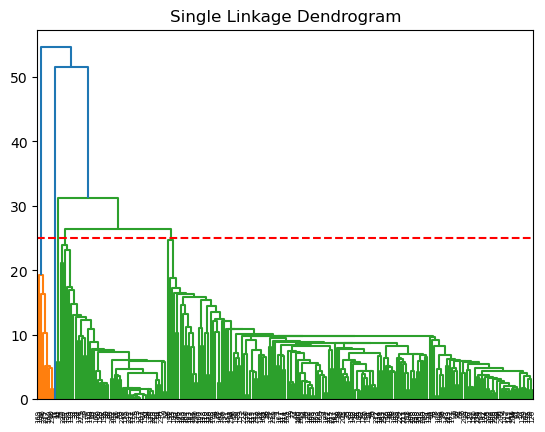

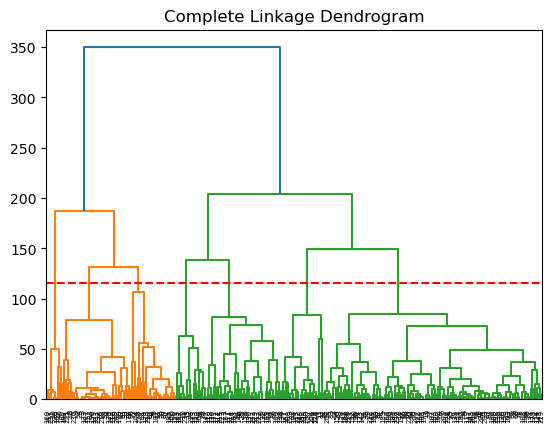

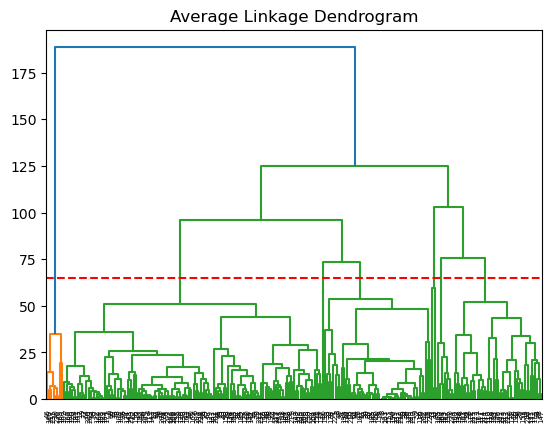

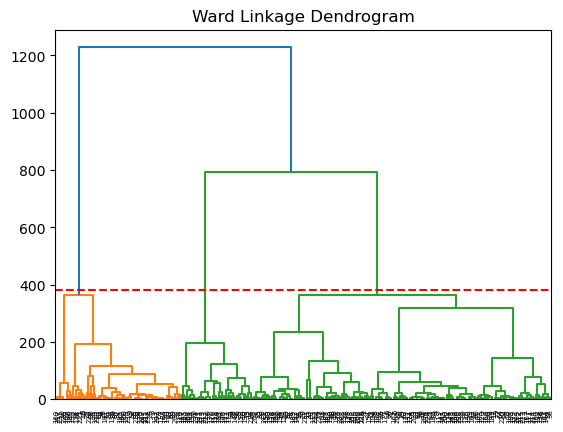

In [103]:
#Q2.2 + Q2.3
label_encoder = LabelEncoder()
CountriesData['Continent_Encoded'] = label_encoder.fit_transform(CountriesData['Continent'])

numeric_data = CountriesData.drop(columns=['Country', 'Continent', 'Continent_Encoded'])

data_array = numeric_data.values

#Single Linkage
dendrogram_single = sch.dendrogram(sch.linkage(data_array, method='single'))
plt.title('Single Linkage Dendrogram')
plt.axhline(y=25, color='r', linestyle='--')
plt.show()

#Complete Linkage
dendrogram_complete = sch.dendrogram(sch.linkage(data_array, method='complete'))
plt.title('Complete Linkage Dendrogram')
plt.axhline(y=115, color='r', linestyle='--')
plt.show()

#Average Linkage
dendrogram_average = sch.dendrogram(sch.linkage(data_array, method='average'))
plt.title('Average Linkage Dendrogram')
plt.axhline(y=65, color='r', linestyle='--')
plt.show()

#Ward Linkage
dendrogram_ward = sch.dendrogram(sch.linkage(data_array, method='ward'))
plt.title('Ward Linkage Dendrogram')
plt.axhline(y=380, color='r', linestyle='--')
plt.show()

In [ ]:
#Q2.4
"""

in my opinion the most stable metrics are the complete and the ward,
because both metrics provide a stable dendrogram with fixed distances and ploting
to clarify, in the single linkage the dendrogram was not stable and the clusters
are a lot more than the other metrics.
as well as the ward, it started really good but eventually it didn't
get close to the correct number of clusters because of the
algorithm's way to work.

so in my opinion i will go with the complete linkage because the dendrogram 
was a lot more resonable than the other metrics

"""

In [ ]:
#Q2.5    There is 7 clusters 

"""

Signle >> Too many clusters (more than 100)
****** Complete >> Perfect score (7 clusters) ******
Avergae >> good enough (5 clusters)
ward >> not the best choice(3 clusters)

"""

In [ ]:
#Student name: Khalid Nimri
#Student ID: 2140145